## Forecasting Covid-19 Cases

### Import the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("D:\Final_project\data\EDA.csv")

In [4]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population,population_density
65799,ZWE,Africa,Zimbabwe,2021-02-07,34552.0,65.0,166.286,1326.0,10.0,15.571,...,202042.626514,173260.613062,-12018.854475,20179.002912,2189.385,13593.731,11657.234,1357.674,14862927.0,42.729
65800,ZWE,Africa,Zimbabwe,2021-02-08,34658.0,106.0,158.571,1339.0,13.0,15.000,...,200489.896645,173548.194279,-11394.374095,20075.984392,2155.236,13489.261,11676.583,1350.742,14862927.0,42.729
65801,ZWE,Africa,Zimbabwe,2021-02-09,34781.0,123.0,138.143,1353.0,14.0,14.143,...,199250.060411,174435.659533,-11105.734623,19997.080279,2215.303,13405.843,11736.293,1345.434,14862927.0,42.729
65802,ZWE,Africa,Zimbabwe,2021-02-10,34864.0,83.0,128.571,1364.0,11.0,13.571,...,197971.146576,175151.001255,-11703.673670,19929.314019,2182.777,13319.795,11784.422,1340.874,14862927.0,42.729
65803,ZWE,Africa,Zimbabwe,2021-02-11,34864.0,0.0,99.000,1364.0,0.0,10.857,...,188557.868114,177056.676529,-14126.035117,19375.934871,1558.995,12686.456,11912.639,1303.642,14862927.0,42.729


### Select Subset Datasets

In [3]:
International= df[df['location']=="International"]

In [4]:
world= df[df['location']=="World"]

In [5]:
Saudi = df[df['location']=="Saudi Arabia"]

### Prepare the Datasets for Modeling

In [6]:
International= International.filter(['date','new_cases'])
# remove all columns except "date" and "new cases"
International.columns = ['ds', 'y'] # rename the columns 
 # exporting the data
    

In [7]:
world= world.filter(['date','new_cases'])
# remove all columns except "date" and "new cases"
world.columns = ['ds', 'y'] # rename the columns 
 # exporting the data


In [8]:
Saudi= Saudi.filter(['date','new_cases'])
# remove all columns except "date" and "new cases"
Saudi.columns = ['ds', 'y'] # rename the columns 
 # exporting the data

### Ploting the Datasets

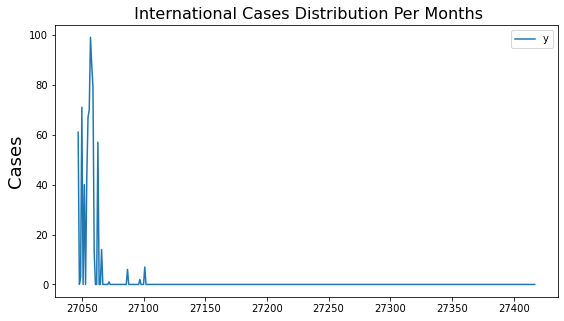

In [9]:
# importing libraries 
from matplotlib import pyplot
import matplotlib.pyplot as plt

International.plot(figsize=(9, 5)) #plot the dataset
plt.title(" International Cases Distribution Per Months", fontsize=16) #set title and it size
plt.ylabel('Cases', fontsize=18) # set y axis name and size
plt.xlabel('', fontsize=18); #set x axis size

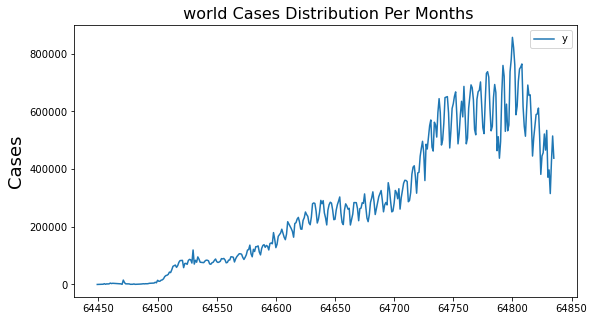

In [10]:
world.plot(figsize=(9, 5)) #plot the dataset
plt.title(" world Cases Distribution Per Months", fontsize=16) #set title and it size
plt.ylabel('Cases', fontsize=18) # set y axis name and size
plt.xlabel('', fontsize=18); #set x axis size

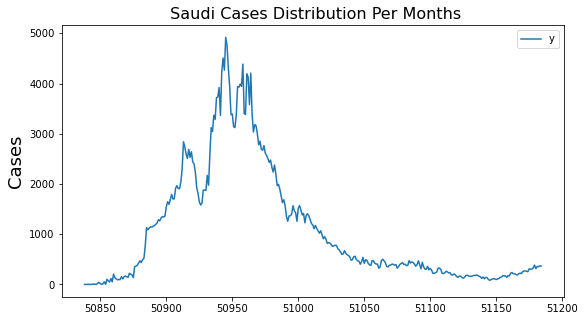

In [11]:
Saudi.plot(figsize=(9, 5)) #plot the dataset
plt.title(" Saudi Cases Distribution Per Months", fontsize=16) #set title and it size
plt.ylabel('Cases', fontsize=18) # set y axis name and size
plt.xlabel('', fontsize=18); #set x axis size

### The Baseline Model

In [12]:
import itertools # importing library
def base_line(df):
    srise_value = df.y.values # take the y column data
    value = pd.DataFrame(srise_value) # make dataframe
    #create new dataframe contain a value and y value shifted
    new_df = pd.concat([value,value.shift(1)],axis=1 ) 
    new_df.columns = ['present','futur']  # name the columns
    result = new_df.futur.tail(1).item() # set result to the last value in new_df 
    global baselin # set result baseline dataset to global
    baselin = list(itertools.repeat(result, 90)) # iterate result
    return baselin #return iterator result

In [13]:
#International Baseline model
Int = base_line(International)

In [14]:
#world Baseline model
w = base_line(world)

In [15]:
#Saudi Baseline model
S = base_line(Saudi)

### Create Dataframe for the Baseline Model Results

In [16]:
#International
import datetime #importing library
date_list = [datetime.timedelta(days=x) for x in range(1,len(Int)+1)]  
# creat dayes for values in base line model
p1 = pd.concat([pd.Series(Int), pd.Series(date_list)], axis=1) 
# merge columns to one dataframe
p1.columns = ['y','ds'] # name the columns
p1.tail()

,y,ds
85,0.0,86 days
86,0.0,87 days
87,0.0,88 days
88,0.0,89 days
89,0.0,90 days


In [17]:
#world
date_list = [datetime.timedelta(days=x) for x in range(1,len(w)+1)]  
# creat dayes for values in base line model
p2 = pd.concat([pd.Series(w), pd.Series(date_list)], axis=1) 
# merge columns to one dataframe
p2.columns = ['y','ds'] # name the columns
p2.tail()

,y,ds
85,514862.0,86 days
86,514862.0,87 days
87,514862.0,88 days
88,514862.0,89 days
89,514862.0,90 days


In [18]:
#Saudi
date_list = [datetime.timedelta(days=x) for x in range(1,len(S)+1)]  
# creat dayes for values in base line model
p3 = pd.concat([pd.Series(S), pd.Series(date_list)], axis=1) 
# merge columns to one dataframe
p3.columns = ['y','ds'] # name the columns
p3.tail()

,y,ds
85,369.0,86 days
86,369.0,87 days
87,369.0,88 days
88,369.0,89 days
89,369.0,90 days


### Plot the Baseline Model Result  

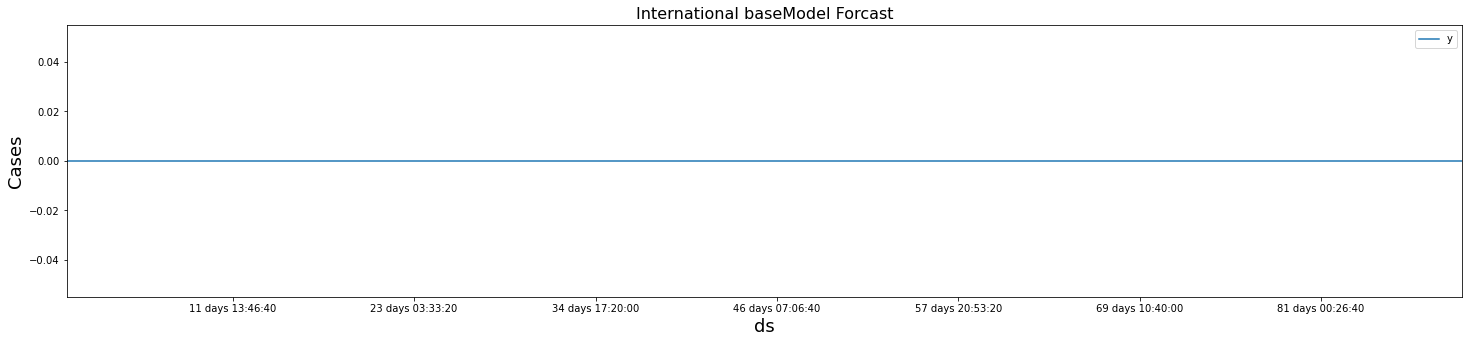

In [19]:
#International
p1.plot("ds","y",figsize=(25, 5)) # plot the data
plt.title("International baseModel Forcast", fontsize=16) # set title
plt.ylabel('Cases', fontsize=18) #set y axis name and size
plt.xlabel('ds', fontsize=18);#set x axis name and size

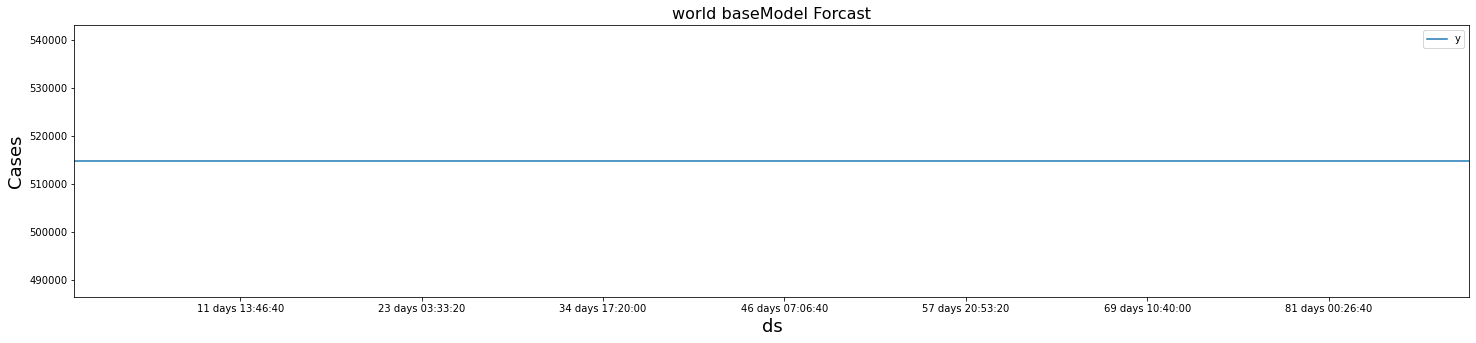

In [20]:
#world
p2.plot("ds","y",figsize=(25, 5)) # plot the data
plt.title("world baseModel Forcast", fontsize=16) # set title
plt.ylabel('Cases', fontsize=18) #set y axis name and size
plt.xlabel('ds', fontsize=18);#set x axis name and size

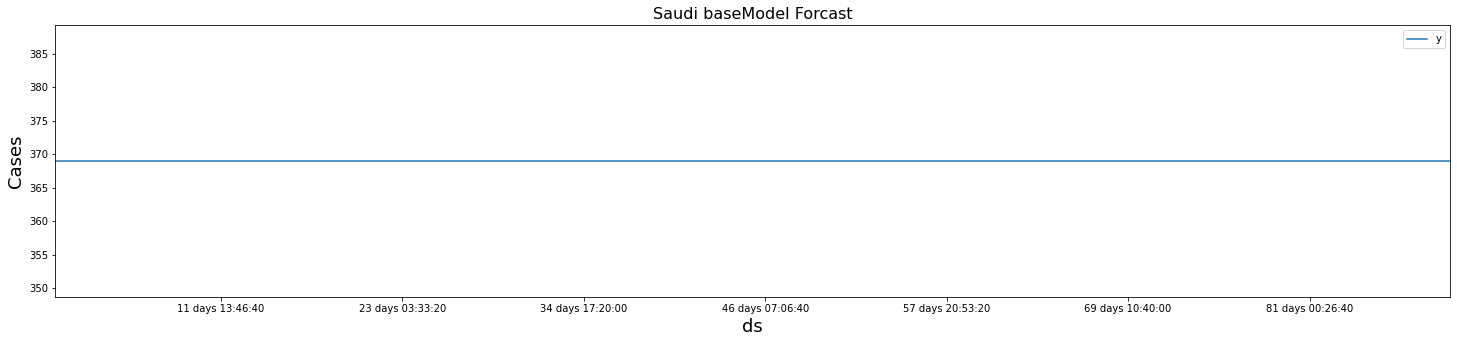

In [21]:
#Saudi
p3.plot("ds","y",figsize=(25, 5)) # plot the data
plt.title("Saudi baseModel Forcast", fontsize=16) # set title
plt.ylabel('Cases', fontsize=18) #set y axis name and size
plt.xlabel('ds', fontsize=18);#set x axis name and size

### Baseline Model Scores

In [22]:
from sklearn.metrics import mean_absolute_error

##### International Baseline Model Score

In [23]:
mean_absolute_error(International.y[:90], Int)

8.011111111111111

##### World Baseline Model Score

In [24]:
mean_absolute_error(world.y[:90], w)

487182.5

##### Saudi Baseline Model Score

In [25]:
mean_absolute_error(Saudi.y[:90], S)

804.3555555555556

### Prophet Models

In [26]:
from fbprophet import Prophet # import propht

#### International Prophet Model

In [27]:
m = Prophet() # set up model
m.fit(International) # fit model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_Int = m.make_future_dataframe(periods=365)
#make a dataframe to hold your future value predictions

In [29]:
future_Int.tail() # see the data

,ds
731,2022-02-07
732,2022-02-08
733,2022-02-09
734,2022-02-10
735,2022-02-11


In [30]:
m.predict(future_Int) #  make a forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-07,20.702194,7.938730,32.452464,20.702194,20.702194,-0.151995,-0.151995,-0.151995,-0.151995,-0.151995,-0.151995,0.0,0.0,0.0,20.550199
1,2020-02-08,20.401033,7.016058,32.630411,20.401033,20.401033,-0.753577,-0.753577,-0.753577,-0.753577,-0.753577,-0.753577,0.0,0.0,0.0,19.647456
2,2020-02-09,20.099873,8.691426,32.276346,20.099873,20.099873,0.454282,0.454282,0.454282,0.454282,0.454282,0.454282,0.0,0.0,0.0,20.554155
3,2020-02-10,19.798712,8.514018,33.196920,19.798712,19.798712,1.265996,1.265996,1.265996,1.265996,1.265996,1.265996,0.0,0.0,0.0,21.064708
4,2020-02-11,19.497552,7.100862,31.394314,19.497552,19.497552,-0.206922,-0.206922,-0.206922,-0.206922,-0.206922,-0.206922,0.0,0.0,0.0,19.290630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-02-07,-0.346873,-23.479580,26.458207,-22.144854,22.371729,1.265996,1.265996,1.265996,1.265996,1.265996,1.265996,0.0,0.0,0.0,0.919123
732,2022-02-08,-0.347309,-25.559463,24.558864,-22.194086,22.489271,-0.206922,-0.206922,-0.206922,-0.206922,-0.206922,-0.206922,0.0,0.0,0.0,-0.554231
733,2022-02-09,-0.347745,-23.564059,27.344786,-22.257786,22.606813,0.923393,0.923393,0.923393,0.923393,0.923393,0.923393,0.0,0.0,0.0,0.575649
734,2022-02-10,-0.348180,-25.931580,24.386839,-22.368085,22.720739,-1.531178,-1.531178,-1.531178,-1.531178,-1.531178,-1.531178,0.0,0.0,0.0,-1.879358


In [31]:
forecast_Int = m.predict(future_Int) #  make a forecast 
forecast_Int[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # chosen columns

,ds,yhat,yhat_lower,yhat_upper
731,2022-02-07,0.919123,-22.883899,26.490046
732,2022-02-08,-0.554231,-24.312474,24.667110
733,2022-02-09,0.575649,-23.435149,25.080623
734,2022-02-10,-1.879358,-25.542010,23.668893
735,2022-02-11,-0.500610,-24.773364,25.937778


#### Plot the Forecast for International Data

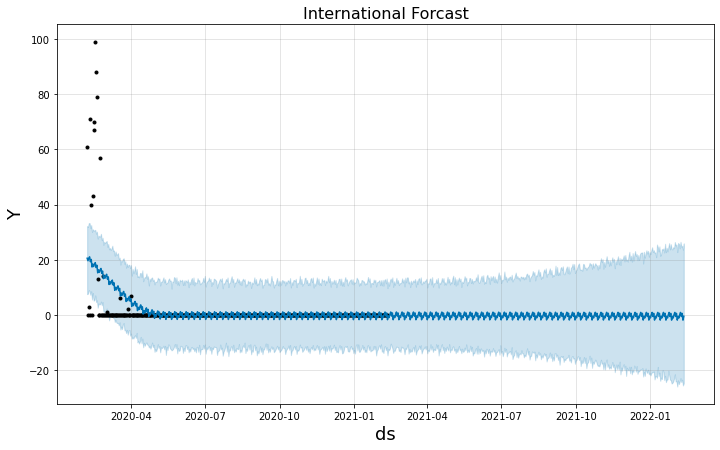

In [32]:
m.plot(forecast_Int); # plot 
plt.title("International Forcast", fontsize=16) # set title
plt.ylabel('Y', fontsize=18) #set y axis name and size
plt.xlabel('ds', fontsize=18);#set x axis name and size

 - Black dots: actual values
 - Blue lines: upper, actual (dark blue), lower windows for yhat
 - Blue blob: prediction window (yhat window)

### Plot Components of International Forcast (Trend,Weekly)

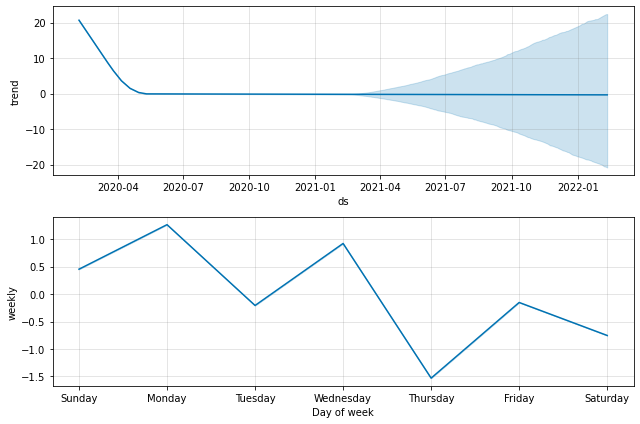

In [33]:
m.plot_components(forecast_Int);#plot

#### World Prophet Model

In [34]:
m1 = Prophet() # set up model 
m1.fit(world) # fit model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future_W = m.make_future_dataframe(periods=365)
#make a dataframe to hold your future value predictions

In [36]:
future_W.tail() # see the data

,ds
731,2022-02-07
732,2022-02-08
733,2022-02-09
734,2022-02-10
735,2022-02-11


In [37]:
m1.predict(future_W) #  make a forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-07,-10608.346258,-48379.780896,8.354813e+04,-10608.346258,-1.060835e+04,27655.449735,27655.449735,27655.449735,27655.449735,27655.449735,27655.449735,0.0,0.0,0.0,17047.103477
1,2020-02-08,-9411.974851,-76992.813629,5.605230e+04,-9411.974851,-9.411975e+03,-1318.119703,-1318.119703,-1318.119703,-1318.119703,-1318.119703,-1318.119703,0.0,0.0,0.0,-10730.094554
2,2020-02-09,-8215.603445,-120985.667085,2.017050e+04,-8215.603445,-8.215603e+03,-42280.738107,-42280.738107,-42280.738107,-42280.738107,-42280.738107,-42280.738107,0.0,0.0,0.0,-50496.341552
3,2020-02-10,-7019.232038,-102952.578716,3.072996e+04,-7019.232038,-7.019232e+03,-33592.304953,-33592.304953,-33592.304953,-33592.304953,-33592.304953,-33592.304953,0.0,0.0,0.0,-40611.536992
4,2020-02-11,-5822.860632,-74065.917411,6.101900e+04,-5822.860632,-5.822861e+03,-532.618487,-532.618487,-532.618487,-532.618487,-532.618487,-532.618487,0.0,0.0,0.0,-6355.479119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-02-07,438946.725143,-200276.413021,1.006779e+06,-159172.441001,1.033471e+06,-33592.304953,-33592.304953,-33592.304953,-33592.304953,-33592.304953,-33592.304953,0.0,0.0,0.0,405354.420189
732,2022-02-08,438579.915066,-176677.292723,1.058742e+06,-161669.110836,1.034954e+06,-532.618487,-532.618487,-532.618487,-532.618487,-532.618487,-532.618487,0.0,0.0,0.0,438047.296580
733,2022-02-09,438213.104990,-131798.520668,1.076460e+06,-165367.613423,1.036398e+06,23034.541194,23034.541194,23034.541194,23034.541194,23034.541194,23034.541194,0.0,0.0,0.0,461247.646184
734,2022-02-10,437846.294914,-135074.256680,1.090890e+06,-167180.688454,1.038034e+06,27033.790321,27033.790321,27033.790321,27033.790321,27033.790321,27033.790321,0.0,0.0,0.0,464880.085235


In [38]:
forecast_W = m1.predict(future_Int) #  make a forecast 
forecast_W[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # chosen columns

,ds,yhat,yhat_lower,yhat_upper
731,2022-02-07,405354.420189,-182633.718129,1.055469e+06
732,2022-02-08,438047.296580,-147872.614339,1.086339e+06
733,2022-02-09,461247.646184,-124888.796824,1.117533e+06
734,2022-02-10,464880.085235,-146811.884025,1.128343e+06
735,2022-02-11,465134.934572,-123652.623173,1.138391e+06


#### Plot the Forecast for World Data

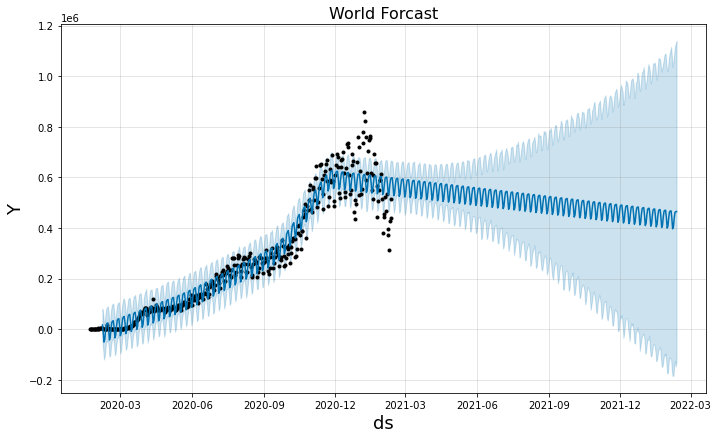

In [39]:
m1.plot(forecast_W); #plot
plt.title("World Forcast", fontsize=16) # set title
plt.ylabel('Y', fontsize=18) #set y axis name and size
plt.xlabel('ds', fontsize=18);#set x axis name and size

 - Black dots: actual values
 - Blue lines: upper, actual (dark blue), lower windows for yhat
 - Blue blob: prediction window (yhat window)

### Plot Components of IWorld Forcast (Trend,Weekly)


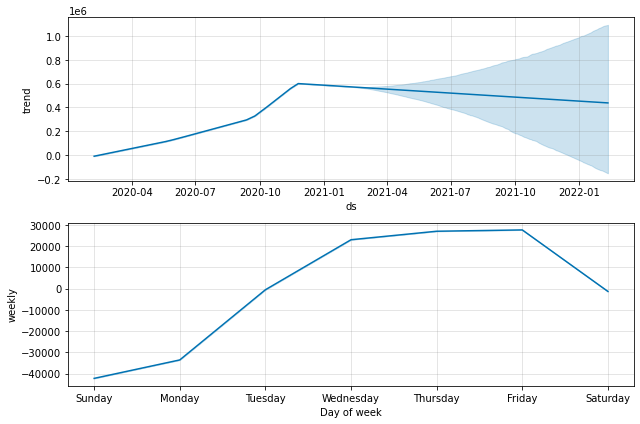

In [40]:
m1.plot_components(forecast_W); #plot

#### Saudi Prophet Model

In [41]:
m2 = Prophet() #set up model
m2.fit(Saudi) # fit model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
future_S = m2.make_future_dataframe(periods=365)
#make a dataframe to hold your future value predictions

In [43]:
future_S.tail() # see the data

,ds
707,2022-02-07
708,2022-02-08
709,2022-02-09
710,2022-02-10
711,2022-02-11


In [44]:
m2.predict(future_S )#  make a forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-02,-601.387581,-1016.613588,-184.356711,-601.387581,-601.387581,13.842536,13.842536,13.842536,13.842536,13.842536,13.842536,0.0,0.0,0.0,-587.545045
1,2020-03-03,-566.190579,-985.770935,-151.204006,-566.190579,-566.190579,5.174496,5.174496,5.174496,5.174496,5.174496,5.174496,0.0,0.0,0.0,-561.016083
2,2020-03-04,-530.993577,-965.306174,-135.531100,-530.993577,-530.993577,-6.954218,-6.954218,-6.954218,-6.954218,-6.954218,-6.954218,0.0,0.0,0.0,-537.947795
3,2020-03-05,-495.796575,-941.345276,-61.028915,-495.796575,-495.796575,-11.347144,-11.347144,-11.347144,-11.347144,-11.347144,-11.347144,0.0,0.0,0.0,-507.143719
4,2020-03-06,-460.599574,-883.382068,0.032491,-460.599574,-460.599574,23.823963,23.823963,23.823963,23.823963,23.823963,23.823963,0.0,0.0,0.0,-436.775611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2022-02-07,-895.591197,-9450.190844,7441.811636,-9516.544871,7226.649282,13.842536,13.842536,13.842536,13.842536,13.842536,13.842536,0.0,0.0,0.0,-881.748661
708,2022-02-08,-898.329124,-9461.807033,7342.142319,-9551.429303,7266.184561,5.174496,5.174496,5.174496,5.174496,5.174496,5.174496,0.0,0.0,0.0,-893.154628
709,2022-02-09,-901.067050,-9748.510904,7352.146599,-9614.148515,7313.583804,-6.954218,-6.954218,-6.954218,-6.954218,-6.954218,-6.954218,0.0,0.0,0.0,-908.021269
710,2022-02-10,-903.804977,-9546.259859,7344.340877,-9673.777055,7360.983046,-11.347144,-11.347144,-11.347144,-11.347144,-11.347144,-11.347144,0.0,0.0,0.0,-915.152121


In [45]:
forecast_S = m2.predict(future_Int) #  make a forecast 
forecast_S[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # chosen columns

,ds,yhat,yhat_lower,yhat_upper
731,2022-02-07,-881.748661,-9872.120437,7211.313578
732,2022-02-08,-893.154628,-9874.090323,7234.984544
733,2022-02-09,-908.021269,-9988.956254,7183.646889
734,2022-02-10,-915.152121,-9973.306173,7239.824261
735,2022-02-11,-882.718941,-10101.224609,7331.374021


#### Plot the Forecast for Saudi Data

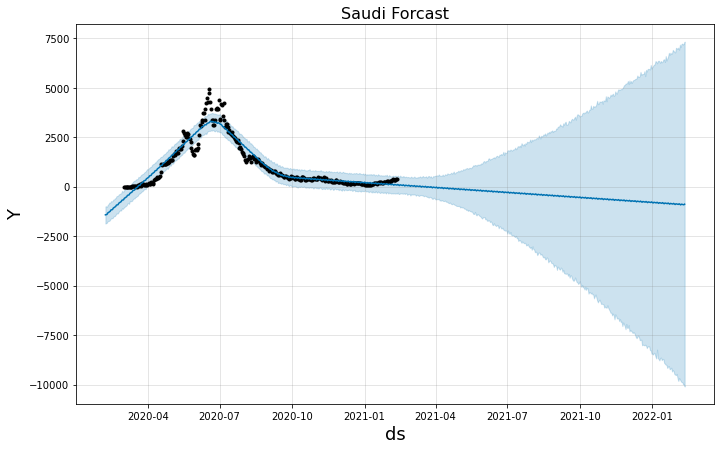

In [46]:
m2.plot(forecast_S); # plot m2 
plt.title("Saudi Forcast", fontsize=16) # set title
plt.ylabel('Y', fontsize=18) #set y axis name and size
plt.xlabel('ds', fontsize=18);#set x axis name and size

 - Black dots: actual values
 - Blue lines: upper, actual (dark blue), lower windows for yhat
 - Blue blob: prediction window (yhat window)

#### Plot Components of Saudi Forcast (Trend,Weekly)


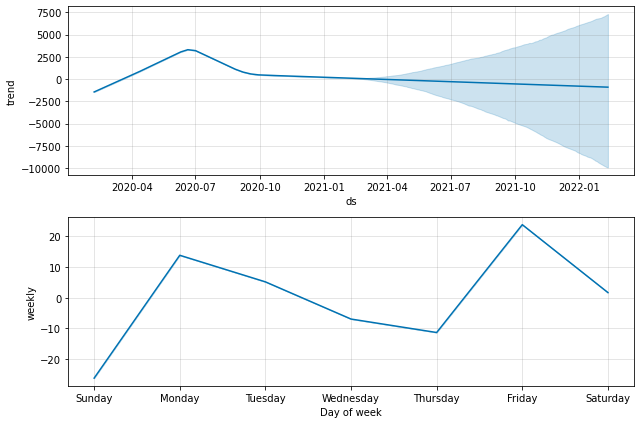

In [47]:
m2.plot_components(forecast_S); #plot

### Models Valiadtion

In [48]:
from fbprophet.diagnostics import cross_validation # import cross_validation

#### International Model Valiadtion

In [49]:
Int_cv = cross_validation(m, initial='180 days', period='30 days', horizon='90 days')
Int_cv.tail()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-08-15 00:00:00 and 2020-11-13 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
355,2021-02-07,-0.289656,-14.728811,14.610286,0.0,2020-11-13
356,2021-02-08,0.780397,-13.312947,14.778147,0.0,2020-11-13
357,2021-02-09,-1.175760,-15.166346,11.915954,0.0,2020-11-13
358,2021-02-10,0.317515,-14.432007,15.048279,0.0,2020-11-13
359,2021-02-11,-2.940298,-17.562912,11.976756,0.0,2020-11-13


- initial: how much data to consider before making any predictions
- period: how frequently to make predictions 
- horizon: how many periods to predict

#### World Model Valiadtion

In [50]:
W_cv = cross_validation(m1, initial='180 days', period='30 days', horizon='90 days')
W_cv.tail()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-08-15 00:00:00 and 2020-11-13 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
355,2021-02-07,9.423845e+05,878420.652936,1.005549e+06,397050.0,2020-11-13
356,2021-02-08,9.536786e+05,886097.078165,1.023537e+06,315176.0,2020-11-13
357,2021-02-09,9.713878e+05,904134.634059,1.039398e+06,427277.0,2020-11-13
358,2021-02-10,9.899952e+05,918633.868072,1.054727e+06,514862.0,2020-11-13
359,2021-02-11,1.002870e+06,929859.893290,1.069670e+06,437761.0,2020-11-13


- initial: how much data to consider before making any predictions
- period: how frequently to make predictions 
- horizon: how many periods to predict

#### Saudi Model Valiadtion

In [51]:
S_cv = cross_validation(m2, initial='180 days', period='30 days', horizon='90 days')
S_cv.tail()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2020-09-14 00:00:00 and 2020-11-13 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
265,2021-02-07,-723.092579,-1907.365492,437.529466,317.0,2020-11-13
266,2021-02-08,-683.277603,-1924.354978,553.448449,356.0,2020-11-13
267,2021-02-09,-712.868756,-1986.930352,507.912986,353.0,2020-11-13
268,2021-02-10,-739.247702,-2050.209976,536.516120,369.0,2020-11-13
269,2021-02-11,-755.189568,-1999.156669,534.872966,364.0,2020-11-13


- initial: how much data to consider before making any predictions
- period: how frequently to make predictions 
- horizon: how many periods to predict

### Plot the Valiadtions 

In [52]:
from fbprophet.plot import plot_cross_validation_metric

####  Plot International Valiadtion

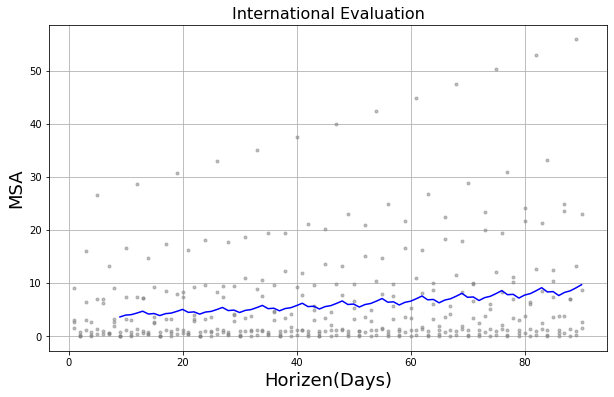

In [53]:
fig = plot_cross_validation_metric(Int_cv, metric='mse')
plt.title("International Evaluation", fontsize=16) # set title
plt.ylabel('MSA', fontsize=18) #set y axis name and size
plt.xlabel('Horizen(Days)', fontsize=18);#set x axis name and size

####  Plot World Valiadtion

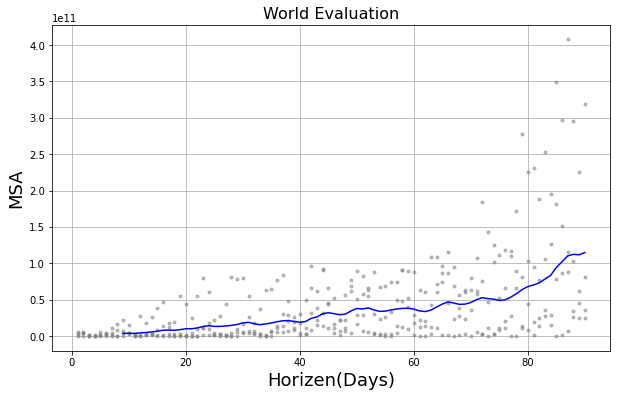

In [54]:
fig = plot_cross_validation_metric(W_cv, metric='mse')
plt.title("World Evaluation", fontsize=16) # set title
plt.ylabel('MSA', fontsize=18) #set y axis name and size
plt.xlabel('Horizen(Days)', fontsize=18);#set x axis name and size

####  Plot Saudi Valiadtion

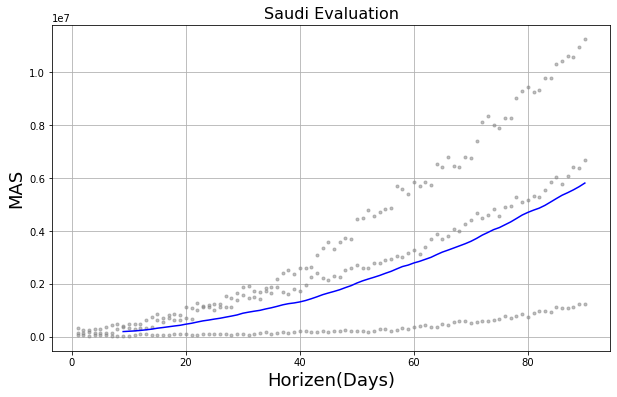

In [55]:
fig = plot_cross_validation_metric(S_cv, metric='mse')
plt.title("Saudi Evaluation", fontsize=16) # set title
plt.ylabel('MAS', fontsize=18) #set y axis name and size
plt.xlabel('Horizen(Days)', fontsize=18);#set x axis name and size

### Models Scors

In [56]:
from fbprophet.diagnostics import performance_metrics

#### International Model Score

In [57]:
df_p = performance_metrics(Int_cv) # performance matrics
df_p.tail(3) 

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
79,88 days,8.502603,2.915922,2.310295,inf,1.0
80,89 days,9.057125,3.009506,2.312601,inf,1.0
81,90 days,9.668629,3.109442,2.430505,inf,1.0


In [58]:
df_p.mae.tail(1) # mean_absolute_error 8.011111111111111

81    2.430505
Name: mae, dtype: float64

#### World Model Score

In [59]:
df_p = performance_metrics(W_cv) # performance matrics
df_p.tail(3)

,horizon,mse,rmse,mae,mape,mdape,coverage
79,88 days,1.122580e+11,335049.195418,290789.931702,0.550883,0.439984,0.027778
80,89 days,1.116127e+11,334084.896829,290690.870443,0.547552,0.437523,0.027778
81,90 days,1.147476e+11,338744.212386,297002.705972,0.559757,0.434698,0.027778


In [60]:
df_p.mae.tail(1) # mean_absolute_error 487182.5

81    297002.705972
Name: mae, dtype: float64

#### Saudi Model Score

In [61]:
df_p = performance_metrics(S_cv)# performance matrics
df_p.tail(3)

,horizon,mse,rmse,mae,mape,mdape,coverage
79,88 days,5.556503e+06,2357.223658,2180.290392,14.493562,16.645156,0.333333
80,89 days,5.675953e+06,2382.425911,2207.442021,14.558351,16.715839,0.333333
81,90 days,5.813050e+06,2411.026811,2235.389194,14.578988,17.610862,0.333333


In [62]:
df_p.mae.tail(1) # mean_absolute_error 804.3555555555556

81    2235.389194
Name: mae, dtype: float64